# Movie Analyzation Project

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For my project, I've chosen the movies data set because I think it is more interesting to analyze due to movies being connected to pop culture.

My questions are:
- What is the runtime for the movies with top 5000 revenue?
- The number of people directing movies?
- Top 10 genres for the last 3 years? (in the dataset)
- Who are the most casted people?
- Number of websites using https/http for each year

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("tmdb-movies.csv")

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning

#### Removing unused columns

Removing unused columns improves the performance of the analysis and reduces memory usage. You can compare the memory usage from `df.info()` before and after dropping unused columns.

In [5]:
df.drop(["id", "imdb_id", "budget", "tagline", "keywords", "overview", "production_companies", "budget_adj", "revenue_adj", "vote_count", "vote_average", "release_date", "popularity", "original_title"], axis=1, inplace=True)

Let's check the columns after trimming:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   revenue       10866 non-null  int64 
 1   cast          10790 non-null  object
 2   homepage      2936 non-null   object
 3   director      10822 non-null  object
 4   runtime       10866 non-null  int64 
 5   genres        10843 non-null  object
 6   release_year  10866 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 594.4+ KB


#### Handling cells with null or missing values

All the cells with null values are objects, so there isn't really something that can be done for those.

In the `df.describe()` above, we can see `revenue` and `runtime` have a minimum of zero, which doesn't make sense. Those will be replaced with the mean of those columns.

In [7]:
# fillna won't work here as zero is a non-null value
df.revenue.replace(0, df.revenue.mean(), inplace=True)
df.runtime.replace(0, df.runtime.mean(), inplace=True)

C:\Users\Sego\AppData\Local\Temp\ipykernel_14820\2456748797.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.revenue.replace(0, df.revenue.mean(), inplace=True)
C:\Users\Sego\AppData\Local\Temp\ipykernel_14820\2456748797.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Just to be sure, If there are zeros in any column.

In [8]:
df.revenue[df.revenue == 0]

Series([], Name: revenue, dtype: float64)

In [9]:
df.runtime[df.runtime == 0]

Series([], Name: runtime, dtype: float64)

We have successfully replaced all zero values!

#### Checking Types
I will check the types that are object and check if they are appropiate as objects are harder to interact with, unlike numbers.

Columns:
- cast, homepage, director, genres: ✅ They are all strings.

In [10]:
df.dtypes[df.dtypes == "object"]

cast        object
homepage    object
director    object
genres      object
dtype: object

A brief overview of all objects to be sure.

In [11]:
df.select_dtypes("object").head()

,cast,homepage,director,genres
0,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller
1,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,Action|Adventure|Science Fiction|Thriller
2,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller
3,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy
4,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Action|Crime|Thriller


#### Handling "|" in different columns
`cast`, `director`, and `genres` are all represented as a string with multiple items separated by "|".

These data in these columns will be converted into a list.

In [12]:
def split_pipe(item):
    '''
    Returns a list containing each item which was separated by "|"

    Prameters:
        item (string or float): The string to be split, or if it is float, it will be empty
    
    Returns:
        (list): Containing each item
    '''
    # This type check is here so when the item is empty, it doesn't error.
    if type(item) != float:
        return item.split("|")
    else:
        return []

`.map` applies the function to every cell in the column.

In [13]:
df.genres = df.genres.map(split_pipe)
df.cast = df.cast.map(split_pipe)
df.director = df.director.map(split_pipe)

#### Handling Outliers

`runtime` has a maximum of 999 according to the previous `df.describe()`, so I'll remove the outliers from it.

In [14]:
def remove_outliers(series):
    '''
    Returns a series without outliers using the 1.5 * IQR rule

    Prameters:
        series (Series): The series which its outliers will be removed
    
    Returns:
        (Series): The series without outliers
    '''
    first_quart = series.quantile(0.25)
    third_quart = series.quantile(0.75)
    iqr = series.quantile(0.75) - series.quantile(0.25)
    series = series[first_quart - 1.5 * iqr < series]
    series = series[third_quart + 1.5 * iqr > series]
    return series

Now we change `df.runtime` to the series without ouliers.

In [15]:
df.runtime = remove_outliers(df.runtime)

This is how the data looks like after cleaning:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   revenue       10866 non-null  float64
 1   cast          10866 non-null  object 
 2   homepage      2936 non-null   object 
 3   director      10866 non-null  object 
 4   runtime       10116 non-null  float64
 5   genres        10866 non-null  object 
 6   release_year  10866 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 594.4+ KB


In [17]:
df.describe()

,revenue,runtime,release_year
count,1.086600e+04,10116.000000,10866.000000
mean,6.187164e+07,100.797568,2001.322658
std,1.110204e+08,14.658337,12.812941
min,2.000000e+00,59.000000,1960.000000
25%,3.982332e+07,90.000000,1995.000000
50%,3.982332e+07,98.000000,2006.000000
75%,3.982332e+07,110.000000,2011.000000
max,2.781506e+09,142.000000,2015.000000


`runtime` now has a sensible maximum value.

<a id='eda'></a>
## Exploratory Data Analysis

### What is the runtime for the movies with top 5000 revenue?

Here, we see the data is mostly left-skewed.

This scatterplot shows that the majority of movies have runtime from around 80 to 140 minutes and the majority of movies with the highest revenue are from 90 to 143 minutes.

<Axes: xlabel='runtime', ylabel='revenue'>

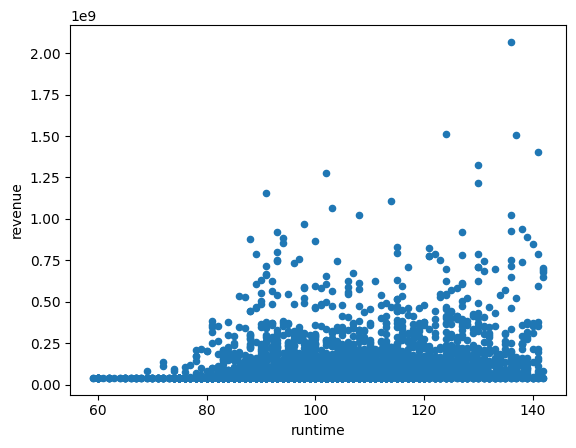

In [18]:
top_revenue = df.nlargest(5000, "revenue")
# I have chosen a scatter plot because it shows each movie as its own dot
top_revenue.plot(x="runtime", y="revenue", kind="scatter")

### The number of people directing movies?

In [19]:
def list_length(item):
    '''
    Returns the length of a list if it isn't a null value

    Prameters:
        item (list): The list to be measured
    
    Returns:
        (int): The length of the list
    '''
    if item != None:
        return len(item)

Again, I am using `.map` to apply this function to every cell in the `director` column.

In [20]:
sorted_directors = df.director.map(list_length).value_counts().sort_values(ascending=False)
sorted_directors

director
1     10068
2       640
3        72
0        44
4        15
6         7
5         5
8         3
7         3
11        2
10        2
30        1
9         1
12        1
27        1
36        1
Name: count, dtype: int64

I'll remove the movies with zero directors as that doesn't make sense.

In [21]:
sorted_directors.drop(0, inplace=True)

I won't include the really high number of people directing movies as it makes the bar plot really big.

<Axes: title={'center': 'Number of directors working on a movie'}, xlabel='Number of directors', ylabel='Number of movies'>

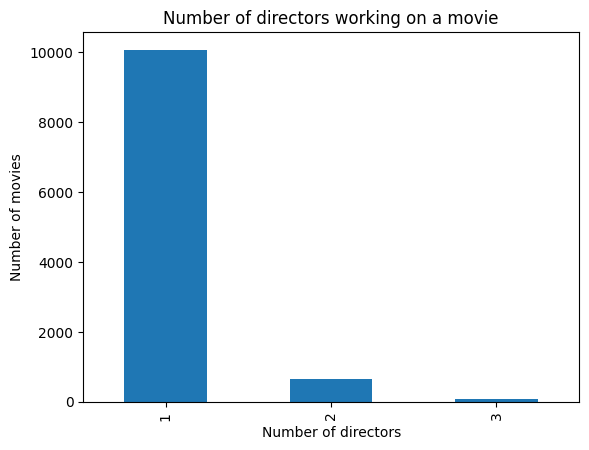

In [22]:
sorted_directors[sorted_directors > 50].plot(xlabel="Number of directors", ylabel="Number of movies", title="Number of directors working on a movie", kind="bar")

This is a right-skewed graph. We can see a majority of movies have only one person directing and less movies with more than one director. 

### Top 10 genres for the last 3 years? (in the dataset)

In [23]:
def top_10_genres(year):
    '''
    Returns the length of a list if it isn't a null value

    Prameters:
        year (int): The year to see the top 10 genres in
    
    Returns:
        (Series): Series containing the top 10 genres in that year
    '''
    return pd.Series(df.genres[df.release_year == year].sum()).value_counts().nlargest(10)

<Axes: title={'center': 'Top 10 genres in 2015'}, xlabel='Genres', ylabel='Number of movies'>

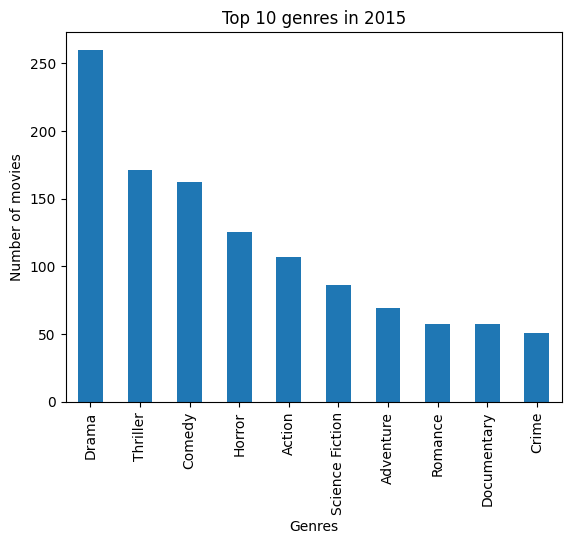

In [24]:
top_10_genres(2015).plot(xlabel="Genres", ylabel="Number of movies", title="Top 10 genres in 2015", kind="bar")

<Axes: title={'center': 'Top 10 genres in 2014'}, xlabel='Genres', ylabel='Number of movies'>

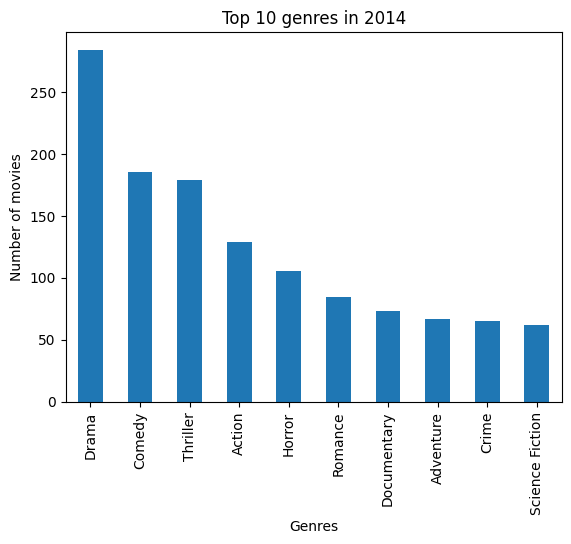

In [25]:
top_10_genres(2014).plot(xlabel="Genres", ylabel="Number of movies", title="Top 10 genres in 2014", kind="bar")

<Axes: title={'center': 'Top 10 genres in 2013'}, xlabel='Genres', ylabel='Number of movies'>

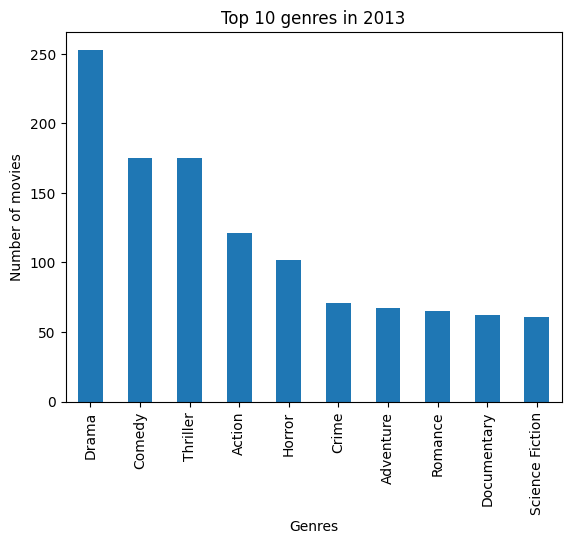

In [26]:
top_10_genres(2013).plot(xlabel="Genres", ylabel="Number of movies", title="Top 10 genres in 2013", kind="bar")

### Who are the most casted people?

<Axes: title={'center': 'Top 10 most casted people'}, xlabel='Cast Names', ylabel='Number of movies'>

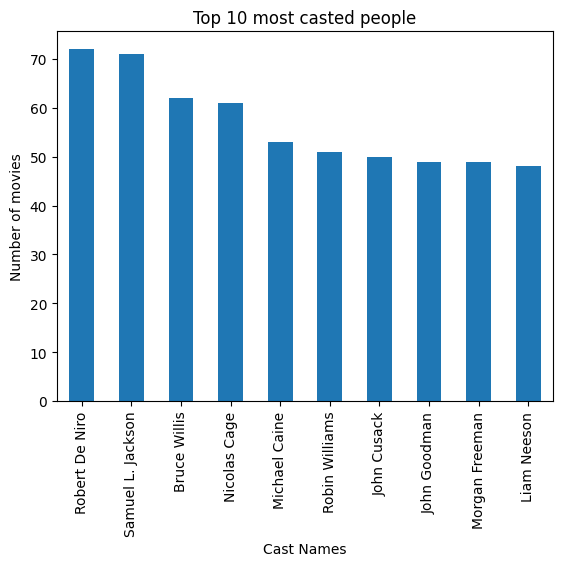

In [27]:
# df.cast.sum() puts all the cast in one list, from then on, the occurence of each cast member can be counted and sorted by the top 10 most casted
top_10_cast = pd.Series(df.cast.sum()).value_counts().nlargest(10)
top_10_cast.plot(xlabel="Cast Names", ylabel="Number of movies", title="Top 10 most casted people", kind="bar")

We can see these people are popular and have been in about 50-70 movies.

### Number of websites using https/http for each year

In [28]:
def get_encrypted(item):
    '''
    Returns the length of a list if it isn't a null value

    Prameters:
        item (string): The URL to see if it is encrypted or not
    
    Returns:
        (bool): True if encrypted, False if using plaintext
    '''
    if item.split("://")[0] == "https":
        return True
    else:
        return False

def get_year_dataframe(year):
    '''
    Returns a DataFrame containing the amount of secure/insecure websites

    Prameters:
        year (int): The year to count the amount of secure/insecure websites
    
    Returns:
        (DataFrame): Contains the amount of websites that are secure/insecure
    '''
    # First, we are getting the rows in homepage for the specific year
    # Second, we drop the null values
    # Third, we execute get_encrypted on each item to get a True/False value on wether its secure or not
    # Fourth, we count the True/False values
    # Fifth, we convert the series to a DataFrame with the name being the year
    # Sixth, some functions to fix the look of the DataFrame
    return df.homepage[df.release_year == year].dropna().map(get_encrypted).value_counts().to_frame(name=str(year)).reset_index().T

In [29]:
# Make an empty DataFrame to add each year to
https_df = pd.DataFrame([])
# Iterate over every year 2010+
for i in df.release_year.unique():
    if i >= 2010:
        https_df = pd.concat([https_df, get_year_dataframe(i)])



In [30]:
https_df

,0,1
homepage,False,True
2015,238,26
homepage,False,True
2014,228,16
homepage,False,NaN
2010,300,NaN
homepage,False,True
2011,315,4
homepage,False,True
2012,247,4


We can see below that the DataFrame has no column names and has a homepage row which is not useful.

In [31]:
# We'll remove the useless homepage rows
https_df.drop(labels="homepage", inplace=True)
# Then set a name for the columns
https_df.columns = ["insecure", "secure"]
# Then fill the NaN values with 0 as that means there were no encrypted websites
https_df.fillna(0, inplace=True)
# Then we'll sort by the year instead of it being in a random order
https_df.sort_index(inplace=True, ascending=False)

C:\Users\Sego\AppData\Local\Temp\ipykernel_14820\543108302.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  https_df.fillna(0, inplace=True)


<Axes: title={'center': 'Websites using TLS/SSL encryption'}, xlabel='Years', ylabel='Number of websites'>

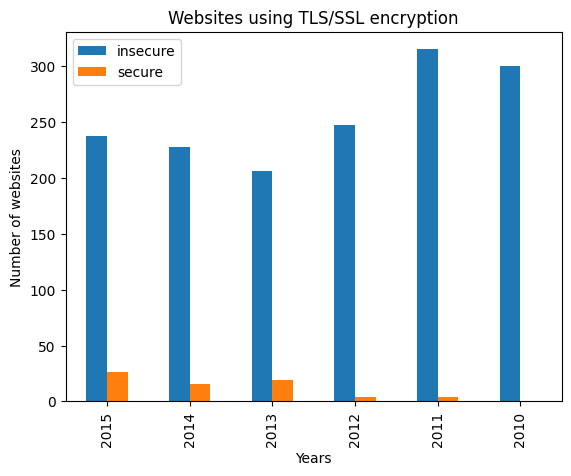

In [32]:
https_df.plot(title="Websites using TLS/SSL encryption", ylabel="Number of websites", xlabel="Years", kind="bar")

We can see the amount of websites using encryption has increased in the previous years. However, an insecure website can be listed on TMDB and still redirect to the encrypted version.

<a id='conclusions'></a>
## Conclusions

We have concluded that:
- The majority of movies have a runtime from 80-140 minutes.
- The majority of movies have one person directing them with a minority having 2 or more.
- Popularity of genres has generally stayed consistent and hasn't changed much.
- Popular actors are the ones casted most in movies and they are generally in about 50-70 movies.
- Usage of https has increased, Let's Encrypt is a non-profit that provides free TLS certificates, which may have contributed to the increase of encryption from 2014 to 2015.

Limitations:
- I have only removed the outliers from `runtime` because when I tried on `revenue` or `release_year`, it would remove too many outliers and make the graphs have too little data and the graphs didn't turn out great.
- The sample data for `homepage` is very small, and websites could redirect to an encrypted version when they are visited, and more websites could have been using https but they were just not in the data set, look at https://transparencyreport.google.com/https/overview?hl=en and see the amount of encrypted traffic in 2014, around 50% and increased to around 70% in 2015.
- Null values in `cast` or `director`.
- There could be a possibility of using the `imdb_id` to lookup the movie metadata as it may have updated in the previous 2 problems.

Note: I have used the pandas API reference to learn new functions and parameters and have not copied any code from the examples or other websites.